In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sksurv.nonparametric import kaplan_meier_estimator

In [21]:
metadata = pd.read_excel(r"C:\Users\javte\Documents\SSEF project\datasets\big metadata\sel_metadat_15Dec22.xlsx")
display(metadata.columns)
metadata['paper_days_to_last_followup'].dropna()

Index(['barcode', 'pam50', 'patient', 'sample', 'shortLetterCode',
       'definition', 'sample_submitter_id', 'sample_type_id', 'sample_id',
       'sample_type', 'days_to_collection', 'state', 'initial_weight',
       'pathology_report_uuid', 'submitter_id', 'oct_embedded', 'is_ffpe',
       'tissue_type', 'synchronous_malignancy', 'ajcc_pathologic_stage',
       'days_to_diagnosis', 'last_known_disease_status',
       'tissue_or_organ_of_origin', 'days_to_last_follow_up',
       'age_at_diagnosis', 'primary_diagnosis', 'prior_malignancy',
       'year_of_diagnosis', 'prior_treatment', 'ajcc_staging_system_edition',
       'ajcc_pathologic_t', 'morphology', 'ajcc_pathologic_n',
       'ajcc_pathologic_m', 'classification_of_tumor', 'diagnosis_id',
       'icd_10_code', 'site_of_resection_or_biopsy', 'tumor_grade',
       'progression_or_recurrence', 'alcohol_history', 'exposure_id', 'race',
       'gender', 'ethnicity', 'vital_status', 'age_at_index', 'days_to_birth',
       'year_of

0        614.0
1        395.0
5       1148.0
6         31.0
7        307.0
         ...  
1184    1224.0
1185    3091.0
1187     371.0
1188     635.0
1189    3030.0
Name: paper_days_to_last_followup, Length: 974, dtype: float64

In [22]:
survival_df = metadata[['pam50', 'vital_status','age_at_index']]
deadOrAlive = dict({'Alive' : True, 'Dead' : False})
survival_df = survival_df.replace({'vital_status' : deadOrAlive})
survival_df[['days_to_collection', 'days_to_death']] = metadata[['days_to_collection', 'days_to_death']]
survival_df['days_to_death']=survival_df['days_to_death'].fillna(survival_df['days_to_collection'])

In [23]:
survival_df=survival_df.drop(index=113)

C:\Users\javte\AppData\Local\Temp\ipykernel_4380\3509133363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_type_df['days_to_collection']=survival_type_df['days_to_collection'].fillna(0)
C:\Users\javte\AppData\Local\Temp\ipykernel_4380\3509133363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_type_df['days_to_collection']=survival_type_df['days_to_collection'].fillna(0)
C:\Users\javte\AppData\Local\Temp\ipykernel_4380\3509133363.py:6: SettingWithCopyWarning: 
A value is trying to 

,pam50,vital_status,age_at_index,days_to_collection,days_to_death
4,Healthy,False,50,2669.0,811.0
15,Healthy,True,31,675.0,675.0
32,Healthy,True,59,1084.0,1084.0
34,Healthy,False,31,4456.0,2273.0
37,Healthy,False,78,4343.0,2127.0
...,...,...,...,...,...
1147,Healthy,False,56,3417.0,1692.0
1174,Healthy,True,47,1335.0,1335.0
1179,Healthy,False,79,2695.0,2009.0
1180,Healthy,False,90,478.0,0.0


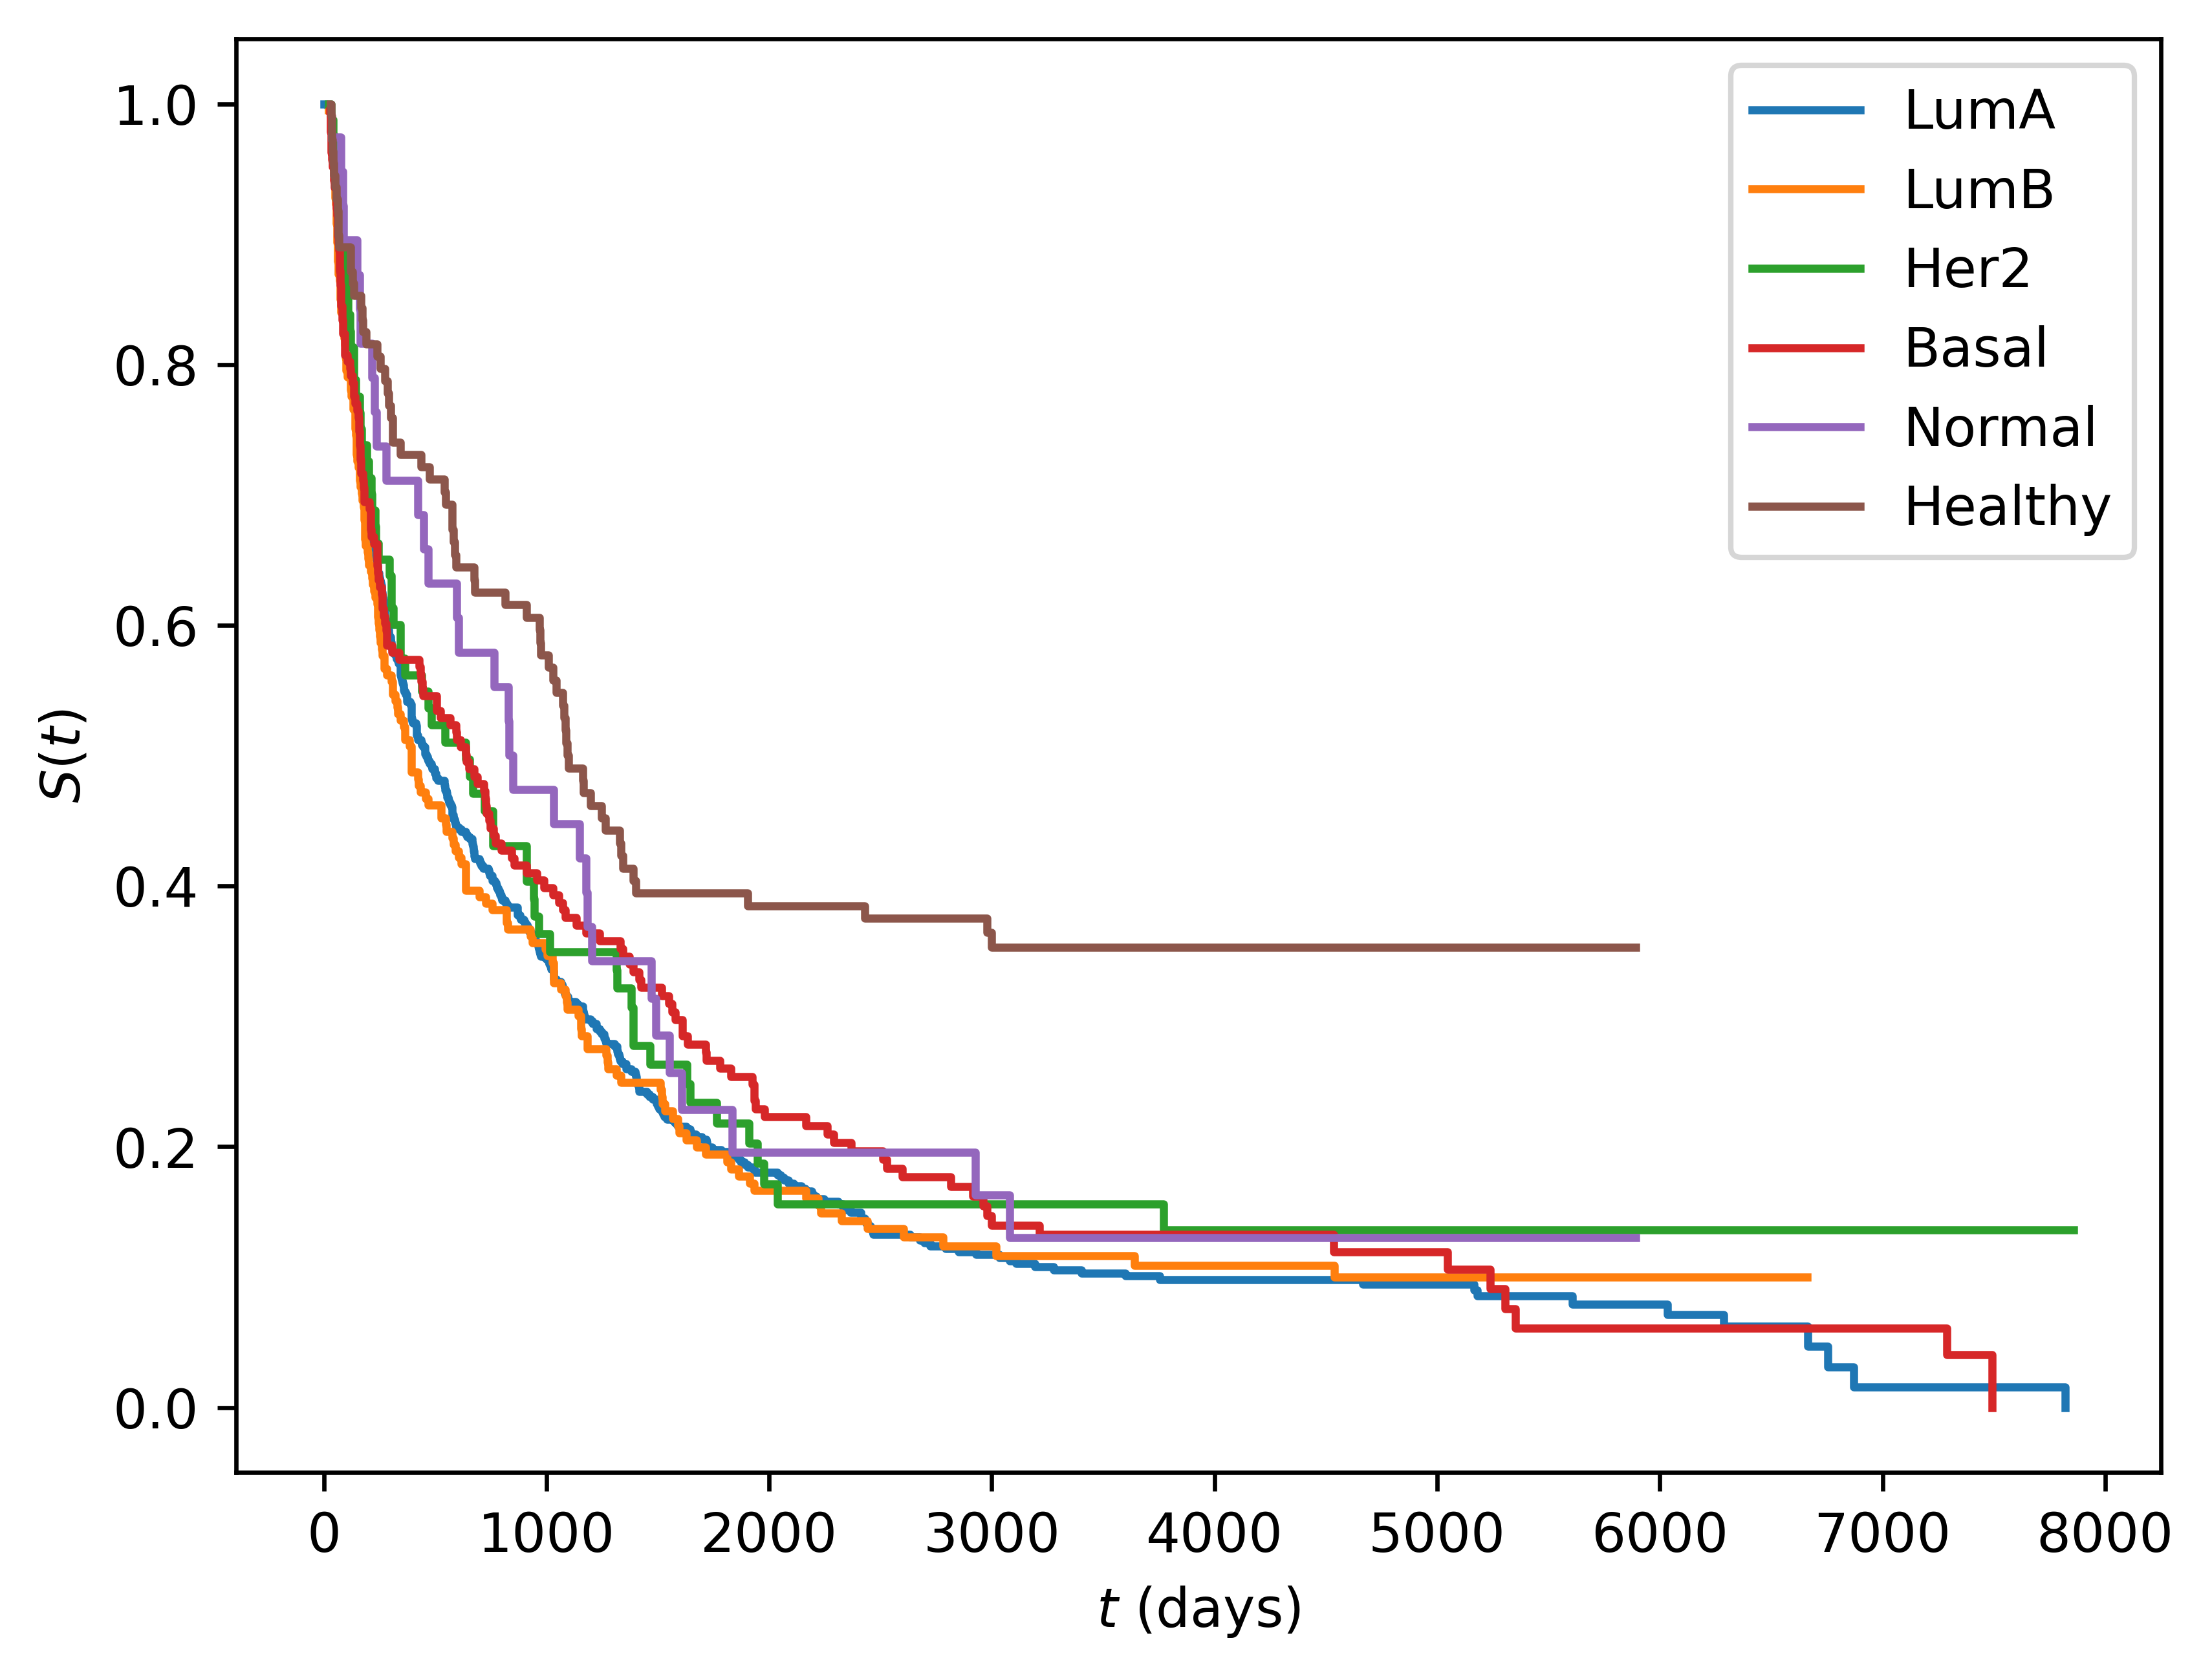

In [25]:
survival_result = pd.DataFrame()
survival_type_df['days_to_collection']=survival_type_df['days_to_collection'].fillna(0)
types = ['LumA', 'LumB', 'Her2', 'Basal', 'Normal','Healthy']
for type in types:
    survival_type_df = survival_df.query('pam50 == @type')
    survival_type_df['days_to_collection']=survival_type_df['days_to_collection'].fillna(0)
    time, survival_prob = kaplan_meier_estimator(survival_type_df['vital_status'], survival_type_df['days_to_collection'])
    plt.step(time, survival_prob, where="post",
             label="%s" % type)
plt.legend(loc='best')
plt.xlabel(r'$t$ (days)');plt.ylabel(r'${S}(t)$')
survival_type_df

In [ ]:
survival_result = pd.DataFrame()
types = ['LumA', 'LumB', 'Her2', 'Basal', 'Normal']
for type in types:
    survival_type_df = survival_df.query('pam50 == @type')
    time, survival_prob = kaplan_meier_estimator(survival_type_df['vital_status'], survival_type_df['days_to_death'])
    plt.step(time, survival_prob, where="post",
             label="%s" % type)
plt.legend(loc='best')
plt.xlabel(r'$t$ (years)');plt.ylabel(r'${S}(t)$')


In [12]:
survival_type_df['days_to_death']=metadata.days_to_death.fillna(0)

0          0.0
1          0.0
2        811.0
3        571.0
4        811.0
         ...  
1185       0.0
1186    2361.0
1187       0.0
1188       0.0
1189       0.0
Name: days_to_death, Length: 1190, dtype: float64